# Criandos os nomes

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [ ]:
# com o comando .sample pegamos uma amostra aleatória do dataset que é alterada a cada recarregamento do comando
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
14,JESSICA,0,456472,15,F
17,LUCIANA,0,429769,18,F
2,FRANCISCA,0,721637,3,F
11,CAMILA,0,469851,12,F
13,BRUNA,0,460770,14,F


In [ ]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
14,MARCELO,0,690098,15,M
1,JOAO,0,2971935,2,M
0,JOSE,0,5732508,1,M
10,LUIS,0,931530,11,M
18,RAIMUNDO,0,611174,19,M


In [ ]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 40


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
# inserindo os dois bd em uma variável lista e utilizando os comandos .concat e .to_frame podemos criar um novo bd com a concatenação dos dados. Entre [] foi possível definir um único campo a ser concatenado
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
15,BRUNO
2,ANTONIO
4,ADRIANA
6,MARCIA
7,FERNANDA


# Incluindo ID dos alunos

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

40

In [ ]:
# com o comando .random.permutation criamos uma coluna id com números aleatórios entre o intervalor do campo amostral
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.sample(3)

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26


In [ ]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio
14,MARCELO,23,@dominiodoemail.com.br
2,FRANCISCA,13,@servicodoemail.com
12,RAFAEL,33,@servicodoemail.com
9,ALINE,21,@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br
13,DANIEL,34,@dominiodoemail.com.br,daniel@dominiodoemail.com.br
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br


# Criano a tabela cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
# sendo o resultado da tabela uma lista com um único item, filtrando essa info em uma nova variável transformamos a tabela html em um df
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando index de cursos

In [ ]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})

In [ ]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
7,FERNANDA,2,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com
17,LUCIANA,32,@servicodoemail.com,luciana@servicodoemail.com
13,BRUNA,8,@servicodoemail.com,bruna@servicodoemail.com


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
6,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,1
16,JULIA,4,@servicodoemail.com,julia@servicodoemail.com,1
8,PATRICIA,14,@dominiodoemail.com.br,patricia@dominiodoemail.com.br,1
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
4,ADRIANA,6,@dominiodoemail.com.br,adriana@dominiodoemail.com.br,1


In [ ]:
nomes.matriculas.describe()

count    40.000000
mean      1.700000
std       0.966092
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: matriculas, dtype: float64

In [ ]:
# o seaborn é um biblioteca focada na visualização de dados baseada no matplotlib
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


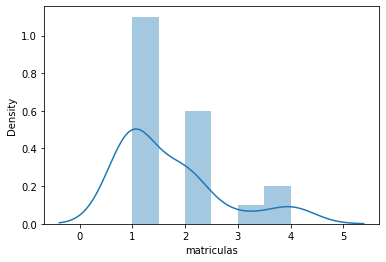

In [ ]:
# com o comando .distplot montamos um gráfico do tipo hist
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    22
2    12
4     4
3     2
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br,1
6,PEDRO,15,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,1
10,SANDRA,9,@servicodoemail.com,sandra@servicodoemail.com,2
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,3
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2


# Selecionando cursos

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
16,EDUARDO,18,@servicodoemail.com,eduardo@servicodoemail.com,1
11,CAMILA,38,@dominiodoemail.com.br,camila@dominiodoemail.com.br,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [ ]:
matriculas.head(5)

,id_aluno,id_curso
0,7,4
1,11,16
2,13,6
3,13,11
4,39,3


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,5,Novas integrações com Java
10,10,Código limpo com C#


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
14,MARCELO,23,@dominiodoemail.com.br,marcelo@dominiodoemail.com.br,2
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,1
18,VANESSA,22,@servicodoemail.com,vanessa@servicodoemail.com,1
7,LUCAS,1,@servicodoemail.com,lucas@servicodoemail.com,2


In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,4
1,11,16
2,13,6
3,13,11
4,39,3


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python


# Saídas em diferentes formatos

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,5,Novas integrações com Java
8,10,Código limpo com C#
9,7,Preparatório para certificação Java


In [ ]:
# comando .to_json para transformar um bd em formato json
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"quantidade_de_alunos":{"1":1,"2":2,"3":6,"4":1,"5":1,"6":4,"7":7,"8":5,"10":10,"11":7,"13":5,"14":7,"15":1,"16":3,"18":6,"19":2},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java"}}'

In [ ]:
# comando .to_html para transformar um df em um arquivo .html
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
# copiando o resultado do print da variável utilizada para gerar o arquivo html e colando o código no Notepad++ podemos salver o arquivo em html e abrir a tabela em algum navegados
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>6</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>7</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>5</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>10</td>
      <

# Criando o banco sql

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando no banco sql

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 5'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,1,Lógica de programação
1,2,2,Java para Web
2,4,1,Ruby on Rails
3,5,1,Cursos de Python
4,6,4,PHP com MySql
5,15,1,Análise de dados
6,16,3,Estatística básica
7,19,2,Boas práticas em Java


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,6
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,5
8,Código limpo com C#,10
9,Preparatório para certificação Java,7


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,6
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,5
8,Código limpo com C#,10
9,Preparatório para certificação Java,7


In [ ]:
muitas_matriculas.query('quantidade_de_alunos > 6')

,nome_do_curso,quantidade_de_alunos
6,.NET para web,7
8,Código limpo com C#,10
9,Preparatório para certificação Java,7
11,Desenvolvendo jogos,7


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 6')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
6,.NET para web,7
8,Código limpo com C#,10
9,Preparatório para certificação Java,7
11,Desenvolvendo jogos,7


# Nomes dos alunos e alunas da próxima tuma

In [ ]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,5,Novas integrações com Java
10,10,Código limpo com C#


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,4
1,11,16
2,13,6
3,13,11
4,39,3


In [ ]:
id_curso = 10
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
18,38,10
31,26,10
33,5,10
34,27,10
43,1,10
47,16,10
53,37,10
54,37,10
57,34,10
66,3,10


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
8,LUIZ,10,@servicodoemail.com,luiz@servicodoemail.com,2
19,MARIANA,17,@dominiodoemail.com.br,mariana@dominiodoemail.com.br,2
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
1,10,LUCAS,@servicodoemail.com,lucas@servicodoemail.com,2
3,10,RODRIGO,@servicodoemail.com,rodrigo@servicodoemail.com,3
5,10,JOAO,@servicodoemail.com,joao@servicodoemail.com,1
16,10,MARCOS,@dominiodoemail.com.br,marcos@dominiodoemail.com.br,1
26,10,JOSE,@servicodoemail.com,jose@servicodoemail.com,4
27,10,ANTONIO,@servicodoemail.com,antonio@servicodoemail.com,1
34,10,DANIEL,@dominiodoemail.com.br,daniel@dominiodoemail.com.br,1
37,10,GABRIEL,@servicodoemail.com,gabriel@servicodoemail.com,3
37,10,GABRIEL,@servicodoemail.com,gabriel@servicodoemail.com,3


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
1       LUCAS
3     RODRIGO
5        JOAO
16     MARCOS
26       JOSE
27    ANTONIO
34     DANIEL
37    GABRIEL
37    GABRIEL
38     CAMILA
Name: nome, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
1,LUCAS
3,RODRIGO
5,JOAO
16,MARCOS
26,JOSE
27,ANTONIO
34,DANIEL
37,GABRIEL
37,GABRIEL


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Código limpo com C#
Name: 10, dtype: object

In [ ]:
# comando realizado para buscar o nome do curso em um outro df
nome_curso = nome_curso.nome_do_curso
nome_curso

'Código limpo com C#'

In [ ]:
# comando join para juntar dois df em um único df. Com os [] simples ou duplo é possível selecionar as colunas que precisam ser exibidas no novo df resultado do join
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma

,nome
id_aluno,
1,LUCAS
3,RODRIGO
5,JOAO
16,MARCOS
26,JOSE
27,ANTONIO
34,DANIEL
37,GABRIEL
37,GABRIEL


In [ ]:
# comando para alterar o nome de uma coluna no df
proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Código limpo com C#
id_aluno,
1,LUCAS
3,RODRIGO
5,JOAO
16,MARCOS
26,JOSE
27,ANTONIO
34,DANIEL
37,GABRIEL
37,GABRIEL


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
proxima_turma

,Alunos do curso de Código limpo com C#
id_aluno,
1,LUCAS
3,RODRIGO
5,JOAO
16,MARCOS
26,JOSE
27,ANTONIO
34,DANIEL
37,GABRIEL
37,GABRIEL


# Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')